In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [2]:
df_30 = pd.read_csv("features_30_sec.csv", delimiter=",")
df_3 = pd.read_csv("features_3_sec.csv", delimiter=",")
df_30.drop('filename',axis=1,inplace=True)
df_3.drop('filename',axis=1,inplace=True)
label = LabelEncoder()
df_30['label_cat'] = label.fit_transform(df_30[['label']])
df_3['label_cat'] = label.fit_transform(df_3[['label']])
df_30_new = df_30.drop('label', axis=1)
df_3_new = df_3.drop('label', axis=1)
df_30_new.fillna(0)
df_3_new.fillna(0)
df_30_new = np.array(df_30_new)
df_3_new = np.array(df_3_new)


C:\Users\szk0237\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\szk0237\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
scaled30 = StandardScaler().fit_transform(df_30_new[:,:-1])
scaled3 = StandardScaler().fit_transform(df_3_new[:,:-1])

In [4]:
h,w = df_30_new.shape
y30 = []
y3 = []
for i,j in enumerate(df_30_new):
 y30.append(df_30_new[i][w-1])
h,w = df_3_new.shape
for i,j in enumerate(df_3_new):
 y3.append(df_3_new[i][w-1])


In [5]:
X_train30, X_test30, y_train30, y_test30 = train_test_split(scaled30, y30, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(scaled3, y3, test_size=0.2, random_state=42)

In [6]:
y_train30 = np.array(y_train30)
y_train3 = np.array(y_train3)


In [7]:
from sklearn.svm import SVC


In [8]:
svclassifier30 = SVC(kernel='linear')
svclassifier30.fit(X_train30,y_train30)

SVC(kernel='linear')

In [9]:
pred_SVM30 = svclassifier30.predict(X_test30)

In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", "{:.00%}".format(accuracy_score(y_test30,pred_SVM30)))


Accuracy:  68%


In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


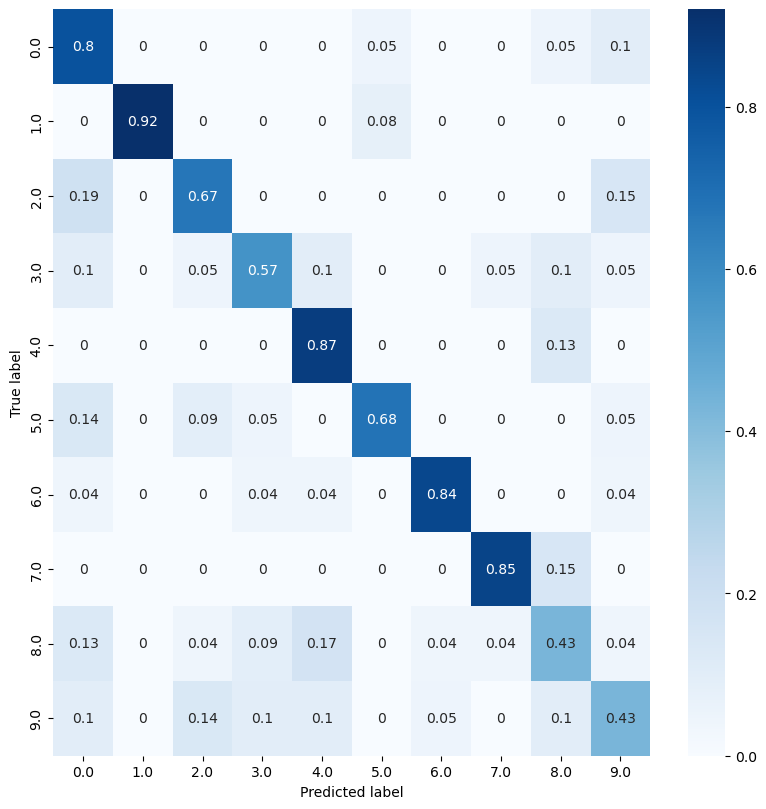

In [19]:
#y_pred = model.predict_classes(X_test3)
# y_pred = np.argmax(model.predict(X_test30), axis=1)
con_mat = tf.math.confusion_matrix(labels=y_test30, predictions=pred_SVM30).numpy()


con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,index = np.unique(y_test30),columns = np.unique(y_test30))

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test30,pred_SVM30))
print(classification_report(y_test30,pred_SVM30))

[[16  0  0  0  0  1  0  0  1  2]
 [ 0 12  0  0  0  1  0  0  0  0]
 [ 5  0 18  0  0  0  0  0  0  4]
 [ 2  0  1 12  2  0  0  1  2  1]
 [ 0  0  0  0 13  0  0  0  2  0]
 [ 3  0  2  1  0 15  0  0  0  1]
 [ 1  0  0  1  1  0 21  0  0  1]
 [ 0  0  0  0  0  0  0 11  2  0]
 [ 3  0  1  2  4  0  1  1 10  1]
 [ 2  0  3  2  2  0  1  0  2  9]]
              precision    recall  f1-score   support

         0.0       0.50      0.80      0.62        20
         1.0       1.00      0.92      0.96        13
         2.0       0.72      0.67      0.69        27
         3.0       0.67      0.57      0.62        21
         4.0       0.59      0.87      0.70        15
         5.0       0.88      0.68      0.77        22
         6.0       0.91      0.84      0.87        25
         7.0       0.85      0.85      0.85        13
         8.0       0.53      0.43      0.48        23
         9.0       0.47      0.43      0.45        21

    accuracy                           0.69       200
   macro avg       

In [21]:
svclassifier3 = SVC(kernel='linear')
svclassifier3.fit(X_train3,y_train3)

SVC(kernel='linear')

In [22]:
pred_SVM3 = svclassifier3.predict(X_test3)

In [23]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", "{:.00%}".format(accuracy_score(y_test3,pred_SVM3)))


Accuracy:  77%


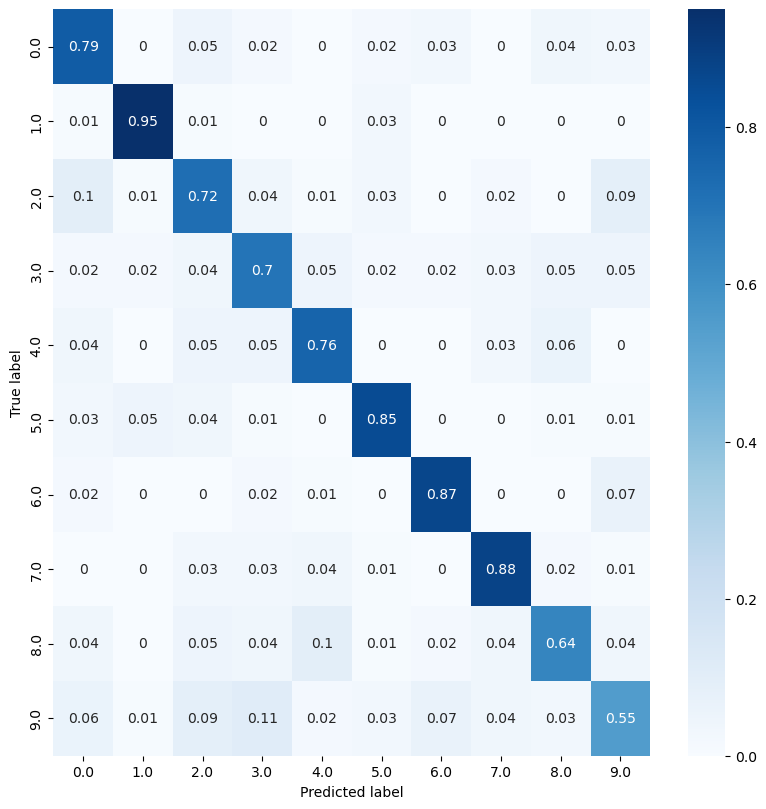

In [24]:

con_mat = tf.math.confusion_matrix(labels=y_test3, predictions=pred_SVM3).numpy()


con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,index = np.unique(y_test3),columns = np.unique(y_test3))

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

C:\Users\szk0237\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


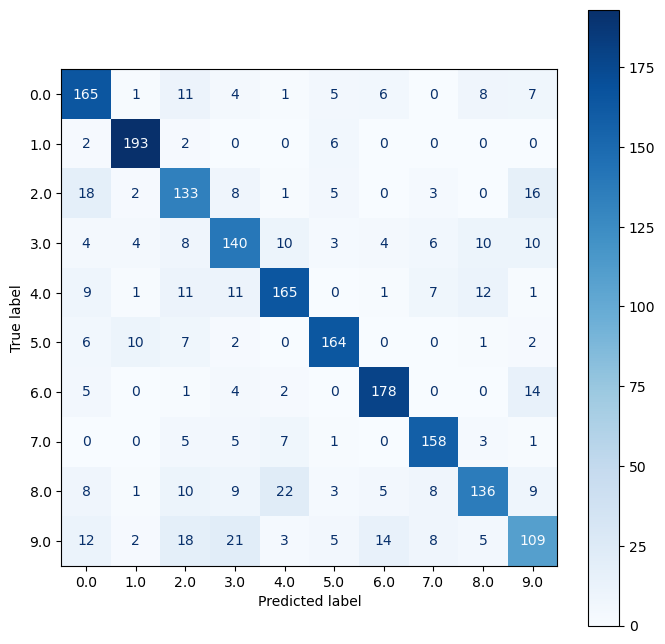

In [17]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(svclassifier3, X_test3, y_test3, cmap=plt.cm.Blues, ax=ax)
plt.show()
